In [18]:
from time import time
import polars as pl
import pandas as pd
import numpy as np
import pyarrow

import matplotlib.pyplot as plt
import seaborn as sns

df = pl.read_csv(r"./datasets/2019-Nov-1M.csv")

In [19]:
df.head()

print(f"Total number of rows: {df.shape[0]}")

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-11-01 00:…","""view""",1003461,2053013555631882655,"""electronics.sm…","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-…"
"""2019-11-01 00:…","""view""",5000088,2053013566100866035,"""appliances.sew…","""janome""",293.65,530496790,"""8e5f4f83-366c-…"
"""2019-11-01 00:…","""view""",17302664,2053013553853497655,null,"""creed""",28.31,561587266,"""755422e7-9040-…"
"""2019-11-01 00:…","""view""",3601530,2053013563810775923,"""appliances.kit…","""lg""",712.87,518085591,"""3bfb58cd-7892-…"
"""2019-11-01 00:…","""view""",1004775,2053013555631882655,"""electronics.sm…","""xiaomi""",183.27,558856683,"""313628f1-68b8-…"


In [20]:
# df_top = df.head(10)

In [21]:
%%time
#Operation on columns

df.with_columns((
    "brand-" + pl.col("brand")
).alias("brand2")).select(pl.col(["brand", "brand2"])).head(10)

CPU times: total: 0 ns
Wall time: 2 ms


brand,brand2
str,str
"""xiaomi""","""brand-xiaomi"""
"""janome""","""brand-janome"""
"""creed""","""brand-creed"""
"""lg""","""brand-lg"""
"""xiaomi""","""brand-xiaomi"""
"""hp""","""brand-hp"""
"""hp""","""brand-hp"""
"""rondell""","""brand-rondell"""
"""michelin""","""brand-michelin…"


In [22]:
%%time
#Multiple operation on columns
# start = time()

df.with_columns([
    ("brand-" + pl.col("brand")).alias("brand2"),
    (pl.col("price") * 100).alias("price2")
]).select(pl.col(["brand", "brand2", "price", "price2"]))
# print(f"Total execution time {round(time() - start, 2)}s")

Total execution time 0.0s


In [28]:
# Aggregation using mean function on a column

%%time

df.select([
    pl.col("price").mean().alias("price_avg")
])

CPU times: total: 0 ns
Wall time: 1.01 ms


price_avg
f64
292.181443


In [34]:
# Aggregation using mean function reporting the value on all the rows by selecting explicitly all the columns

%%time

df.select([pl.all(),
           pl.col("price").mean().alias("price_avg")]).head(10)

UsageError: Line magic function `%%time` not found.


In [37]:
%%time

# Update values based on window function
# Using window function make possible to apply the operation over a target group

df.with_columns([
    pl.col("price").mean().over("category_code").alias("price_by_category_code")
]).head()

CPU times: total: 31.2 ms
Wall time: 44.3 ms


event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,price_by_category_code
str,str,i64,i64,str,str,f64,i64,str,f64
"""2019-11-01 00:…","""view""",1003461,2053013555631882655,"""electronics.sm…","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-…",464.752563
"""2019-11-01 00:…","""view""",5000088,2053013566100866035,"""appliances.sew…","""janome""",293.65,530496790,"""8e5f4f83-366c-…",247.668254
"""2019-11-01 00:…","""view""",17302664,2053013553853497655,null,"""creed""",28.31,561587266,"""755422e7-9040-…",176.442267
"""2019-11-01 00:…","""view""",3601530,2053013563810775923,"""appliances.kit…","""lg""",712.87,518085591,"""3bfb58cd-7892-…",330.713442
"""2019-11-01 00:…","""view""",1004775,2053013555631882655,"""electronics.sm…","""xiaomi""",183.27,558856683,"""313628f1-68b8-…",464.752563


In [38]:
%%time

# Here we can use the over function to be able to perform operation on an entire new column.
# In this case we have both the mean price by category code and the percentage of the price in comparison with the average price for its
# category

df_cat_window = df.select([
    pl.col("category_code"),
    pl.col("price"),
    pl.col("price").mean().over("category_code").alias("price_by_category"),
    (pl.col("price") / pl.col("price").mean().over("category_code") -1).alias("price_div_cat_average")
])

df_cat_window.head()

CPU times: total: 0 ns
Wall time: 53.3 ms


category_code,price,price_by_category,price_div_cat_average
str,f64,f64,f64
"""electronics.sm…",489.07,464.752563,0.052323
"""appliances.sew…",293.65,247.668254,0.185659
null,28.31,176.442267,-0.839551
"""appliances.kit…",712.87,330.713442,1.155552
"""electronics.sm…",183.27,464.752563,-0.605661


CPU times: total: 46.9 ms
Wall time: 274 ms


<Axes: >

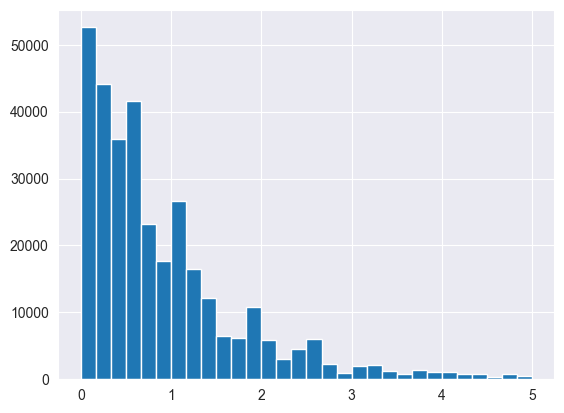

In [39]:
%%time

# Now we can use Pandas to represent the values elaborated by Polars

df_cat_window_pd = df_cat_window.to_pandas()

df_cat_window_pd["price_div_cat_average"].hist(bins=30, range=[0,5])

In [42]:
df_cat_window_pd["price_div_cat_average"].quantile(np.arange(0, 1.1, 0.1))

0.0    -1.000000
0.1    -0.796844
0.2    -0.700642
0.3    -0.595165
0.4    -0.478260
0.5    -0.337222
0.6    -0.135777
0.7     0.111752
0.8     0.520685
0.9     1.119741
1.0    28.339981
Name: price_div_cat_average, dtype: float64

In [44]:
df_cat_window_pd[df_cat_window_pd["price_div_cat_average"]>10].sort_values("price_div_cat_average", ascending=False)

,category_code,price,price_by_category,price_div_cat_average
847809,construction.components.faucet,2065.17,70.387571,28.339981
849208,construction.components.faucet,2065.17,70.387571,28.339981
806209,accessories.bag,1717.16,63.658580,25.974526
417496,accessories.bag,1717.16,63.658580,25.974526
825524,accessories.bag,1717.16,63.658580,25.974526
...,...,...,...,...
468364,apparel.dress,913.79,82.736525,10.044578
456431,apparel.dress,913.79,82.736525,10.044578
535503,apparel.dress,913.79,82.736525,10.044578
20821,None,1942.75,176.442267,10.010684
